## LOGISTIC REGRESSION

In [ ]:
import pandas as pd
df = pd.read_csv('water_potability.csv')
print(df.head())

         ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
RANDOM_STATE= 42

In [ ]:
#check where and in which column there is null values using count()
#Take mean of that column and substitute mean value at the null value.
null_values = df.isnull()
null_counts = null_values.sum(axis=0)
columns_with_null = null_counts[null_counts > 0].index.tolist()
print("Columns with null values:", columns_with_null)

Columns with null values: ['ph', 'Sulfate', 'Trihalomethanes']


In [ ]:
df.mean()

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64

In [ ]:
import pandas as pd
mean_values = df.mean()

# Fill missing values with mean values for each column
df.fillna(mean_values, inplace=True)

# Display the DataFrame to verify the changes
print(df)


            ph    Hardness       Solids  Chloramines     Sulfate  \
0     7.080795  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246  333.775777   
2     8.099124  224.236259  19909.54173     9.275884  333.775777   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362  333.775777   
3273  9.419510  175.762646  33155.57822     7.350233  333.775777   
3274  5.126763  230.603758  11983.86938     6.303357  333.775777   
3275  7.874671  195.102299  17404.17706     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.1

In [ ]:
y= df['Potability']
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64


In [ ]:
x=df.drop('Potability',axis=1)
print(x)

            ph    Hardness       Solids  Chloramines     Sulfate  \
0     7.080795  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246  333.775777   
2     8.099124  224.236259  19909.54173     9.275884  333.775777   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362  333.775777   
3273  9.419510  175.762646  33155.57822     7.350233  333.775777   
3274  5.126763  230.603758  11983.86938     6.303357  333.775777   
3275  7.874671  195.102299  17404.17706     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076  

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x1 = sc.fit_transform(x)
print(x1)

[[0.50577104 0.57113901 0.33609646 ... 0.31340165 0.69975313 0.28609102]
 [0.26543429 0.29740043 0.30061142 ... 0.49731851 0.4509993  0.57679264]
 [0.57850887 0.64131081 0.32161885 ... 0.56201674 0.5328657  0.30363656]
 ...
 [0.67282217 0.46548556 0.53910122 ... 0.33866167 0.56065454 0.34956996]
 [0.36619735 0.66440723 0.19148981 ... 0.34363779 0.62265916 0.61611996]
 [0.56247653 0.53563505 0.28048408 ... 0.5341137  0.63247754 0.16244074]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,random_state=20)

In [ ]:
print(x_train.shape)

(2620, 9)


In [ ]:
from sklearn.linear_model import LogisticRegression
s = LogisticRegression()
model=s.fit(x_train,y_train)

In [ ]:
yp = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,yp))

0.6021341463414634


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       393
           1       1.00      0.01      0.02       263

    accuracy                           0.60       656
   macro avg       0.80      0.50      0.38       656
weighted avg       0.76      0.60      0.46       656



In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming 'inputs_train' and 'target_train' are your training data and labels
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Now you can check the value counts to confirm balancing
print(y_train_smote.value_counts())

Potability
1    1605
0    1605
Name: count, dtype: int64


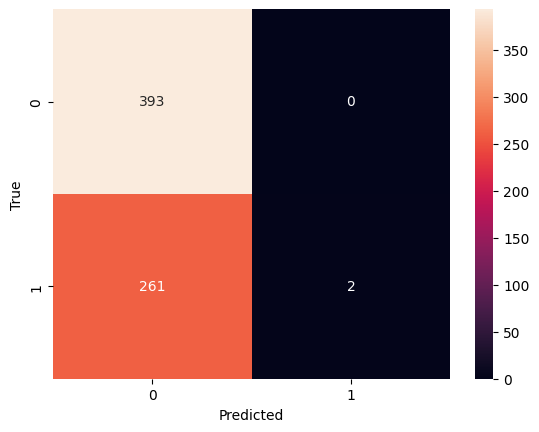

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model and 'inputs_test' is your test data
predictions = model.predict(x_test)

# Now you can create the confusion matrix with the true labels and your predictions
confusion_mat = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# KNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
RANDOM_STATE = 42

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('Potability',axis=1)
y= df['Potability']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=RANDOM_STATE)
print(y_train.value_counts())
print(y_test.value_counts())

Potability
0    1488
1     969
Name: count, dtype: int64
Potability
0    510
1    309
Name: count, dtype: int64


In [ ]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def knn_model_fitting(x_train, x_test, y_train, y_test, n_neighbors):

    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train)

    preds = knn.predict(x_test)
    score = knn.score(x_test, y_test)
    print('The mean accuracy of this KNN classifier is: {}'.format(score))

    return preds, knn
# here just set the # of neighbors =1 to see the model performance
n_neighbors= 1
preds_default, knn_default = knn_model_fitting(x_train, x_test, y_train, y_test, n_neighbors)

The mean accuracy of this KNN classifier is: 0.5274725274725275


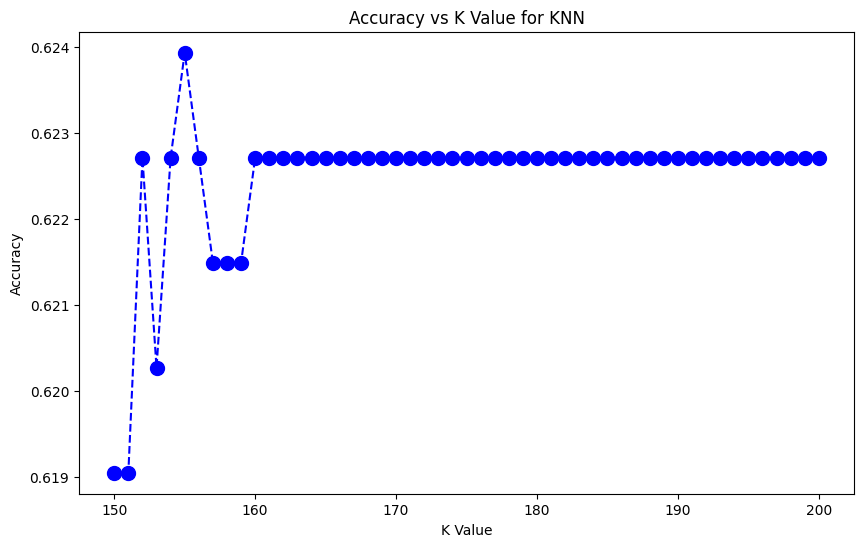

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a list to store the accuracies for different K values
accuracies = []

# Loop through different K values from 2 to 20
for k in range(150, 201):
    # Initialize and fit the KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = knn.predict(x_test)

    # Calculate the accuracy for the current K value
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy to the list
    accuracies.append(accuracy)

# Plot the accuracy vs K graph
plt.figure(figsize=(10, 6))
plt.plot(range(150, 201), accuracies, color="blue", linestyle="--", marker="o", markersize=10)

# Set labels and title
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value for KNN")

# Display the plot
plt.show()

# DECISION TREE

In [ ]:
df=pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df.fillna(0,inplace=True)

In [ ]:
inputs =df.drop('Potability',axis='columns')
target =df['Potability']

In [ ]:
inputs

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.80216,8.061362,0.000000,392.449580,19.903225,0.000000,2.798243
3273,9.419510,175.762646,33155.57822,7.350233,0.000000,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.86938,6.303357,0.000000,402.883113,11.168946,77.488213,4.708658


In [ ]:
target

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(inputs,target)

DecisionTreeClassifier()

In [ ]:
model.score(inputs,target)

1.0

In [ ]:
model.predict([[8.316766,	214.373394,	22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
from sklearn.model_selection import train_test_split
inputs_train,inputs_test,target_train,target_test=train_test_split(inputs,target,random_state=RANDOM_STATE)
print(target_train.value_counts())
print(target_test.value_counts())

Potability
0    1488
1     969
Name: count, dtype: int64
Potability
0    510
1    309
Name: count, dtype: int64


In [ ]:
target_train=target_train.astype('int')
target_test=target_test.astype('int')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

target_pred = model.predict(inputs_test)

accuracy = accuracy_score(target_test, target_pred)
precision = precision_score(target_test, target_pred)
recall = recall_score(target_test, target_pred)
f1 = f1_score(target_test, target_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


# HEAT MAP

In [ ]:
from sklearn.model_selection import train_test_split

# Replace 'inputs' and 'target' with your actual data and labels
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming 'inputs_train' and 'target_train' are your training data and labels
smote = SMOTE(random_state=42)
inputs_train_smote, target_train_smote = smote.fit_resample(inputs_train, target_train)

# Now you can check the value counts to confirm balancing
print(target_train_smote.value_counts())


Potability
0    1488
1    1488
Name: count, dtype: int64


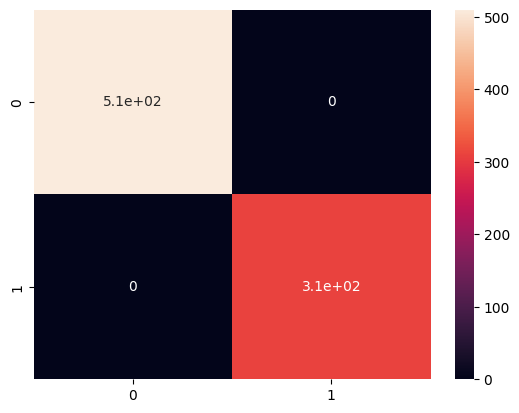

In [ ]:
from sklearn.metrics import confusion_matrix

target_pred = model.predict(inputs_test)

cm = confusion_matrix(target_test, target_pred)
sns.heatmap(cm, annot=True)
plt.show()


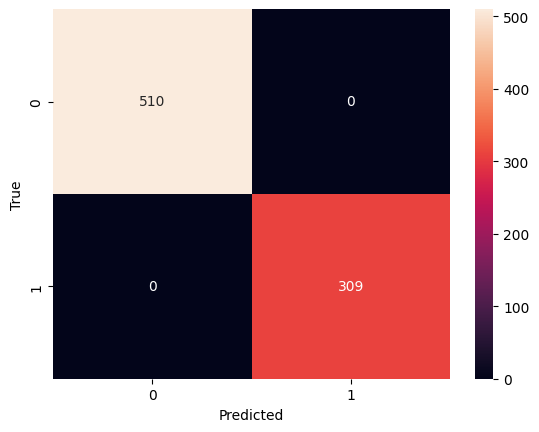

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model and 'inputs_test' is your test data
predictions = model.predict(inputs_test)

# Now you can create the confusion matrix with the true labels and your predictions
confusion_mat = confusion_matrix(target_test, predictions)

# Visualize the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


SUPPORT VECTOR MACHINE

In [ ]:
import pandas as pd

dir(df)

['Chloramines',
 'Conductivity',
 'Hardness',
 'Organic_carbon',
 'Potability',
 'Solids',
 'Sulfate',
 'T',
 'Trihalomethanes',
 'Turbidity',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.Potability

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [ ]:
x=df.iloc[:,0:9]

In [ ]:
y=df.iloc[:,9]
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
len(x_train)

2620

In [ ]:
len(x_test)

656

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
x_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
938,0.000000,248.954655,25253.07906,8.921733,296.821034,482.846939,14.142251,69.104012,3.941074
919,5.606856,211.513097,32423.46269,6.812943,0.000000,446.386404,20.926950,52.218979,4.070966
231,4.443239,178.956206,25008.53225,4.948815,298.576676,429.544773,17.729724,56.347689,3.268325
2348,0.000000,215.491606,18489.65251,3.758833,294.603038,370.274621,6.530429,68.100024,4.582157
942,6.848805,204.812711,20555.55957,9.775004,387.686388,389.638228,12.298753,49.452046,3.130045
...,...,...,...,...,...,...,...,...,...
531,6.145148,197.541072,39657.27211,9.900159,288.157883,319.434033,11.587378,120.030077,4.600886
3060,10.289380,162.780252,18869.21209,6.906497,344.187610,585.679589,18.857141,74.293779,3.500167
1251,6.465094,241.268138,43958.67813,7.420155,306.020393,544.600567,20.768986,89.646506,3.790524
2165,2.803563,186.123924,11920.90742,8.642034,332.744519,447.594219,18.482185,87.697444,3.489939


In [ ]:
model.score(x_test,y_test)

0.6189024390243902

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC()

In [ ]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
x_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
938,0.000000,248.954655,25253.07906,8.921733,296.821034,482.846939,14.142251,69.104012,3.941074
919,5.606856,211.513097,32423.46269,6.812943,0.000000,446.386404,20.926950,52.218979,4.070966
231,4.443239,178.956206,25008.53225,4.948815,298.576676,429.544773,17.729724,56.347689,3.268325
2348,0.000000,215.491606,18489.65251,3.758833,294.603038,370.274621,6.530429,68.100024,4.582157
942,6.848805,204.812711,20555.55957,9.775004,387.686388,389.638228,12.298753,49.452046,3.130045
...,...,...,...,...,...,...,...,...,...
531,6.145148,197.541072,39657.27211,9.900159,288.157883,319.434033,11.587378,120.030077,4.600886
3060,10.289380,162.780252,18869.21209,6.906497,344.187610,585.679589,18.857141,74.293779,3.500167
1251,6.465094,241.268138,43958.67813,7.420155,306.020393,544.600567,20.768986,89.646506,3.790524
2165,2.803563,186.123924,11920.90742,8.642034,332.744519,447.594219,18.482185,87.697444,3.489939


In [ ]:
model.score(x_test,y_test)

0.6204268292682927

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='poly')
model.fit(x_train,y_train)

SVC(kernel='poly')

In [ ]:
model.score(x_test,y_test)

0.6204268292682927

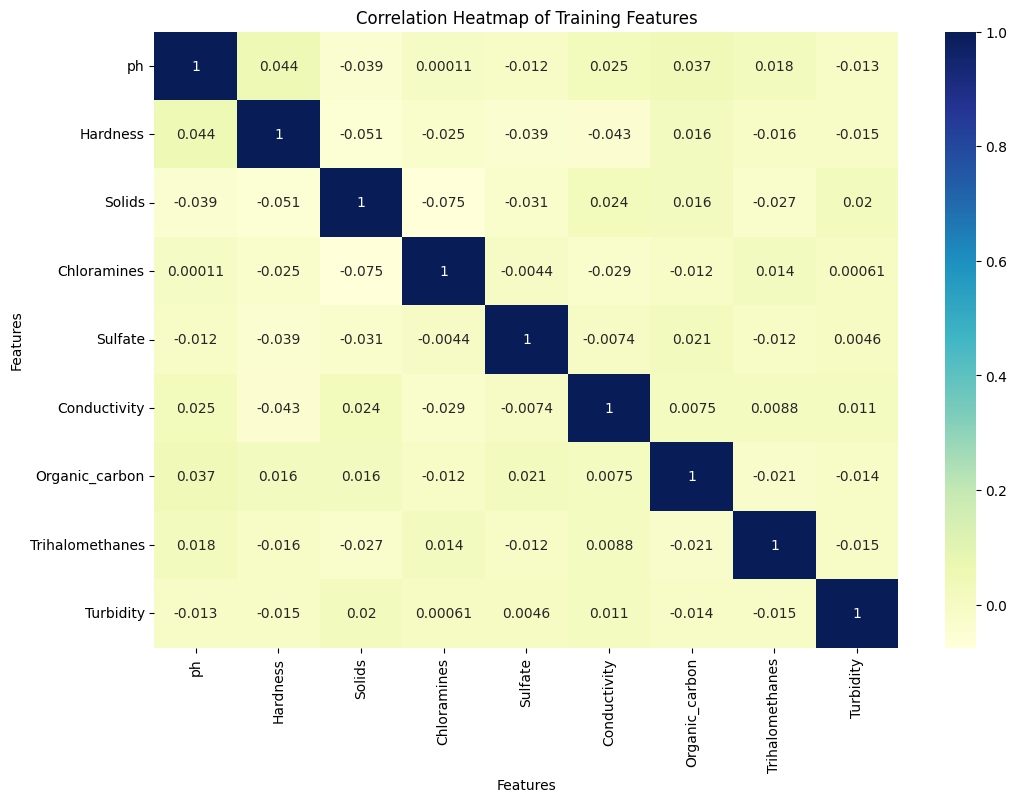

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(x_train.corr(), annot=True, cmap="YlGnBu")

# Set axis labels and title
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap of Training Features")

# Show the plot
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model with training data
rfc.fit(x_train, y_train)

# Predict classes for new data
predictions = rfc.predict(x_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:",accuracy)

Accuracy: 0.6646341463414634


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test,predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.6646341463414634
Precision: 0.6058394160583942
Recall: 0.3333333333333333
F1-Score: 0.4300518134715026


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score


water_df = pd.read_csv('water_potability.csv')

# Handle missing values (NaN)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(water_df.drop(columns=['Potability']))
y = water_df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"GBM Accuracy: {accuracy:.4f}")


GBM Accuracy: 0.6585


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
#df = pd.read_csv('water_potability.csv')

# Assuming the target variable is named 'Potability' and all other columns are features
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_classifier.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"XGBoost Accuracy: {accuracy:.4f}")


XGBoost Accuracy: 0.6692


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the water potability dataset
#df = pd.read_csv('water_potability.csv')  # Make sure to provide the correct path to the file

# Separate features and target variable
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model to the training data
gbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbm.predict(X_test)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

# Print the performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")


Accuracy: 0.6768
Precision: 0.6429
Recall: 0.2951
F1-Score: 0.4045
